1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as sc

In [31]:
# Dataset generation
N = 1000
x1 = np.random.normal(0,1, size=N)
x2 = x1 + np.random.normal(0,3, size=N)
x3 = 2*x1 + x2

data = np.vstack((x1, x2, x3))

# get covariance
cov = np.cov(data)
print("The covariance matrix is:\n", cov)

The covariance matrix is:
 [[ 0.97357738  1.00094292  2.94809768]
 [ 1.00094292 10.30755076 12.3094366 ]
 [ 2.94809768 12.3094366  18.20563195]]


In [32]:
eigvals, eigvect = np.linalg.eig(cov)
eigvals = np.real_if_close(eigvals)

index_sorted = np.argsort(eigvals)[::-1]

eigvals = eigvals[index_sorted]
eigvect = eigvect[:, index_sorted]

print("Eigenvalues:\n", eigvals, '\n')
print("Eigenvectors:\n", eigvect, '\n')

Eigenvalues:
 [2.75170790e+01 1.96968105e+00 1.68047555e-16] 

Eigenvectors:
 [[-0.11139558  0.56650186 -0.81649658]
 [-0.58242467 -0.70293303 -0.40824829]
 [-0.80521583  0.4300707   0.40824829]] 



In [33]:
# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(data)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(N-1)
# The matrix U already contains the eigenvectors
V_svd = U

print("\nEIGENDECOMPOSITION USING SVD:")
print("-Eigenvalues:\n", l_svd)
print("-Eigenvectors:\n", V_svd, "\n")


EIGENDECOMPOSITION USING SVD:
-Eigenvalues:
 [2.75578281e+01 1.96982764e+00 1.20280775e-31]
-Eigenvectors:
 [[-0.11134143  0.56651251 -0.81649658]
 [-0.58249186 -0.70287735 -0.40824829]
 [-0.80517471  0.43014766  0.40824829]] 



In [34]:
# check
check = np.allclose(eigvals, l_svd, 1.e-2)
if check:
    print("The two procedures approximately yield the same eigenvalues.")
check_egv = np.allclose(eigvect, V_svd, 1.e-2)
if check_egv:
    print("The two procedures approximately yield the same eigenvectors.")

The two procedures approximately yield the same eigenvalues.
The two procedures approximately yield the same eigenvectors.


In [35]:
Lambda = np.diag(eigvals)
for i in range(len(eigvals)):
    variability = Lambda[i,i]/Lambda.trace() *100
    print("By selecting component",i," we retain",round(variability),"% of the total variability")
print("by keeping component 0 and 1 , we retain 100% of the information")

By selecting component 0  we retain 93 % of the total variability
By selecting component 1  we retain 7 % of the total variability
By selecting component 2  we retain 0 % of the total variability
by keeping component 0 and 1 , we retain 100% of the information


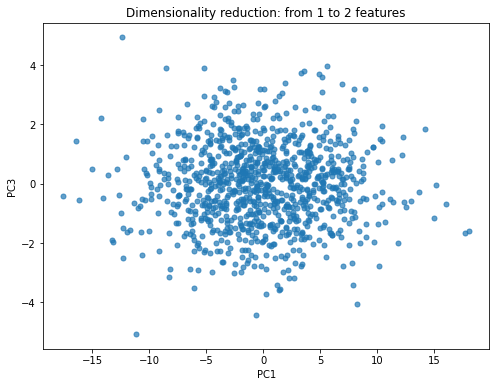

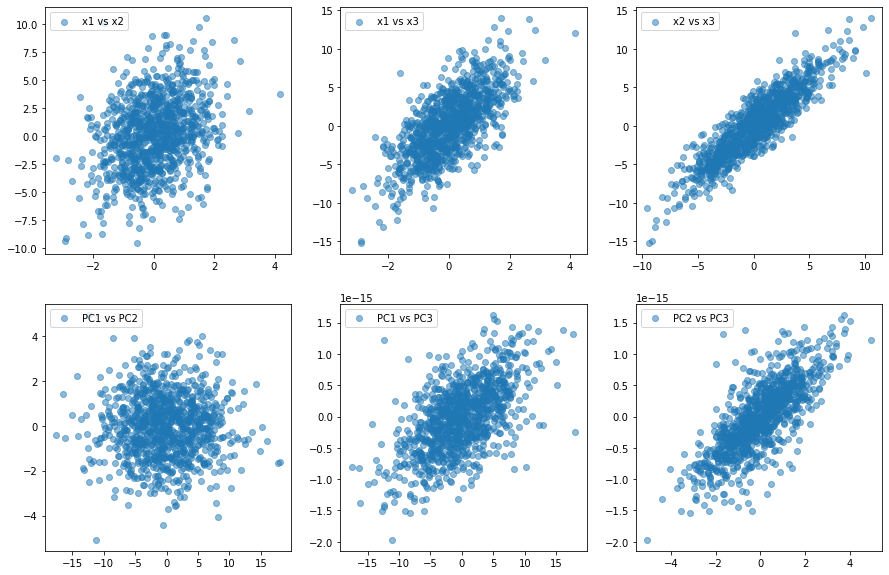

In [46]:
# project the datapoints on the new basis of principal components
eigvect_red = eigvect[:,[0,1]]
X_red = np.matmul(eigvect_red.T, data)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_red[0,:], X_red[1,:], alpha=.7, s=25)
ax.set_title('Dimensionality reduction: from 1 to 2 features')
ax.set_ylabel('PC3')
ax.set_xlabel('PC1')

# change basis (principal eigenvectors)
Xp = np.matmul(eigvect.T, data)

fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs[0,0].scatter(data[0,:], data[1,:], alpha=.5, label='x1 vs x2')
axs[0,1].scatter(data[0,:], data[2,:], alpha=.5,label='x1 vs x3')
axs[0,2].scatter(data[1,:], data[2,:], alpha=.5, label='x2 vs x3')

axs[1,0].scatter(Xp[0,:], Xp[1,:], alpha=.5, label='PC1 vs PC2')
axs[1,1].scatter(Xp[0,:], Xp[2,:], alpha=.5,label='PC1 vs PC3')
axs[1,2].scatter(Xp[1,:], Xp[2,:], alpha=.5, label='PC2 vs PC3')

for ax in axs.flatten():
    ax.legend(loc='upper left')

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [49]:
# generate noise
noise = []
for i in range(10):
    noise.append(np.random.normal(0, 1/50, N))

# add noise to original dataset
data_n = np.concatenate((data, np.array(noise)))

# covariance matrix
cov_n = np.cov(data_n)

# eigendecomposition
egl_n, egv_n = np.linalg.eig(cov_n)

# PCA
Lambda_n = np.diag(np.real_if_close(egl_n))
#print(np.real_if_close(egl_n) / np.trace(Lambda_n))

# results
var = abs(Lambda_n[0,0] + Lambda_n[1,1]) / Lambda_n.trace()
print("Obtained k = 2 and selecting components (0, 1) we retain", var*100,
      "of the total variability.")

Obtained k = 2 and selecting components (0, 1) we retain 99.98655208705391 of the total variability.


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [50]:
# set column names
columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym",
          "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
# get data
df = pd.read_csv("data/magic04.data",names=columns)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [51]:
cov_matrix = df.cov()
l, V = np.linalg.eig(cov_matrix)
l = np.real_if_close(l)
Lambda = np.diag(l)

print("Eigenvalues:\n", l, '\n')

for i in range(len(l)):
    variability = Lambda[i,i]/Lambda.trace() *100
    print("By selecting component",i," we retain",round(variability),"% of the total variability")

Eigenvalues:
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04] 

By selecting component 0  we retain 44 % of the total variability
By selecting component 1  we retain 26 % of the total variability
By selecting component 2  we retain 13 % of the total variability
By selecting component 3  we retain 9 % of the total variability
By selecting component 4  we retain 4 % of the total variability
By selecting component 5  we retain 3 % of the total variability
By selecting component 6  we retain 1 % of the total variability
By selecting component 7  we retain 0 % of the total variability
By selecting component 8  we retain 0 % of the total variability
By selecting component 9  we retain 0 % of the total variability
